In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('/content/ds_salaries.csv')
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [47]:
missing_values = df.isnull().sum()

print("Số giá trị thiếu của bảng dữ liệu:")
print(missing_values)

Số giá trị thiếu của bảng dữ liệu:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [48]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


array([[<Axes: title={'center': 'work_year'}>,
        <Axes: title={'center': 'salary'}>],
       [<Axes: title={'center': 'salary_in_usd'}>,
        <Axes: title={'center': 'remote_ratio'}>]], dtype=object)

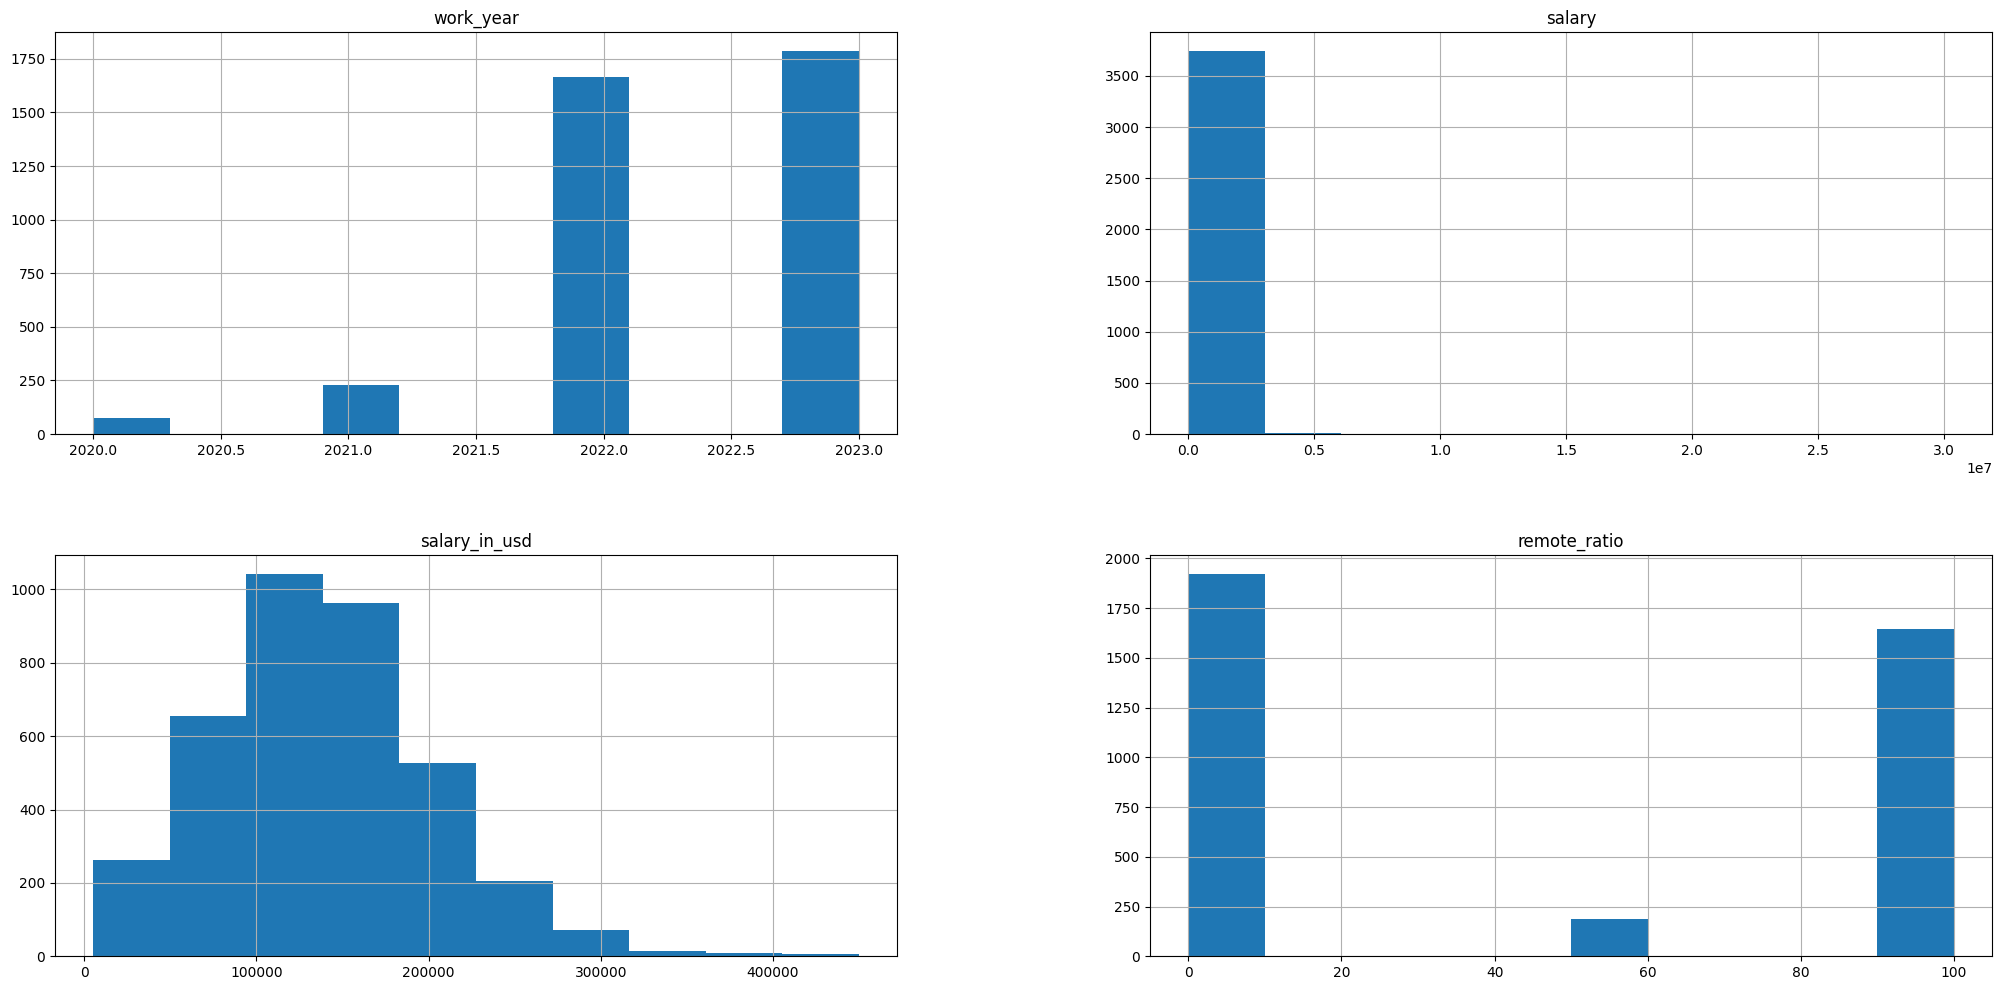

In [49]:
# phân phối tần suất của các thuộc tính
df.hist(figsize=(25,12))

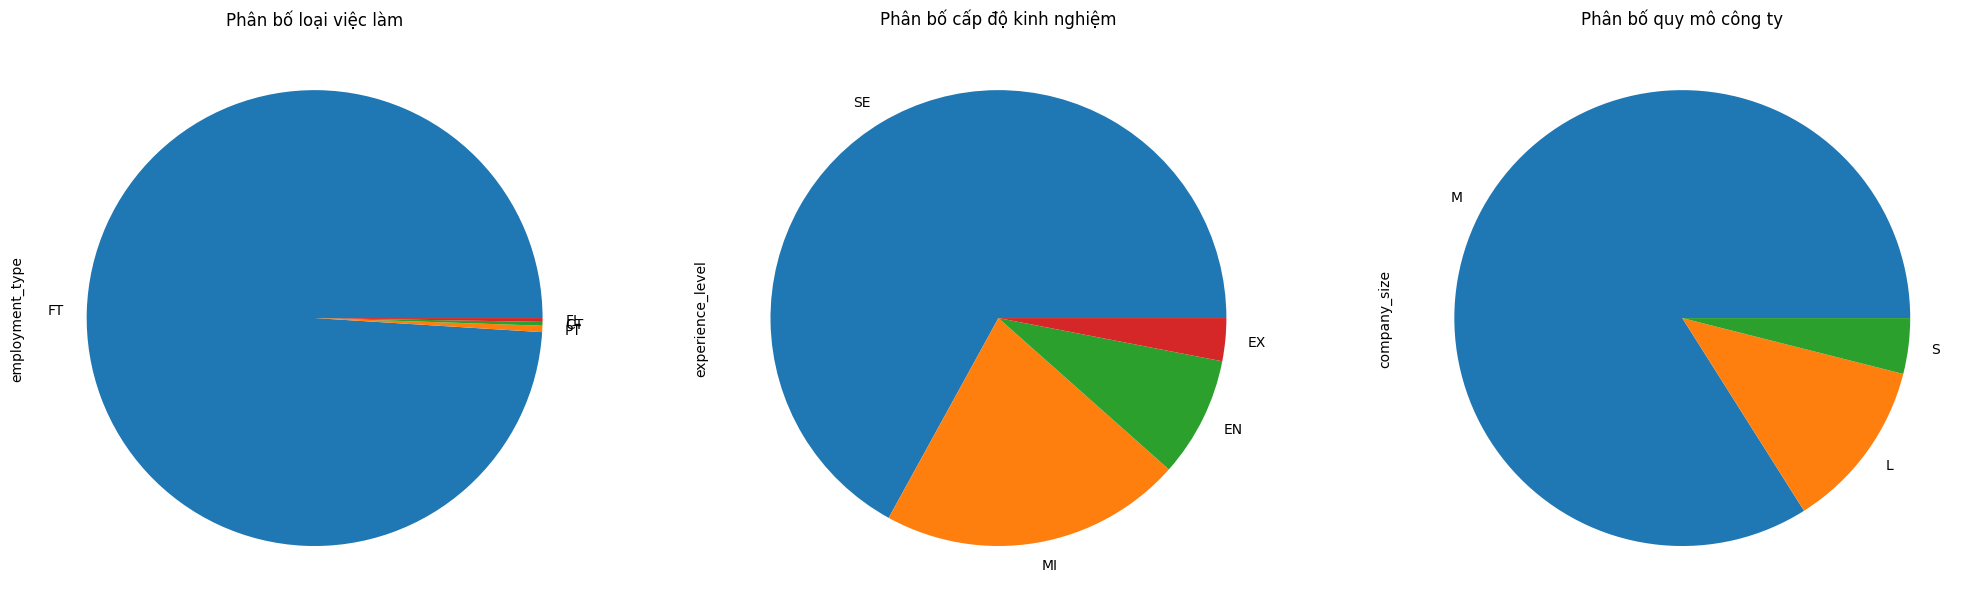

In [50]:
figure, axis = plt.subplots(1, 3, figsize=(25, 15))

axis[0].set_title('Phân bố loại việc làm')
df['employment_type'].value_counts().plot.pie(ax=axis[0])

axis[1].set_title('Phân bố cấp độ kinh nghiệm')
df['experience_level'].value_counts().plot.pie(ax=axis[1])

axis[2].set_title('Phân bố quy mô công ty')
df['company_size'].value_counts().plot.pie(ax=axis[2])

plt.show()

- Hầu hết các loại Việc làm đều là toàn thời gian
- Dữ liệu này cho thấy nhiều nhân viên cấp cao hơn, tiếp theo là cấp trung bình, người mới bắt đầu và giám đốc điều hành
- Hầu hết các quy mô Công ty là Trung bình, tiếp theo là Lớn và cuối cùng là nhỏ

Text(0.5, 1.0, 'Mức lương trung bình dựa trên vị trí công ty')

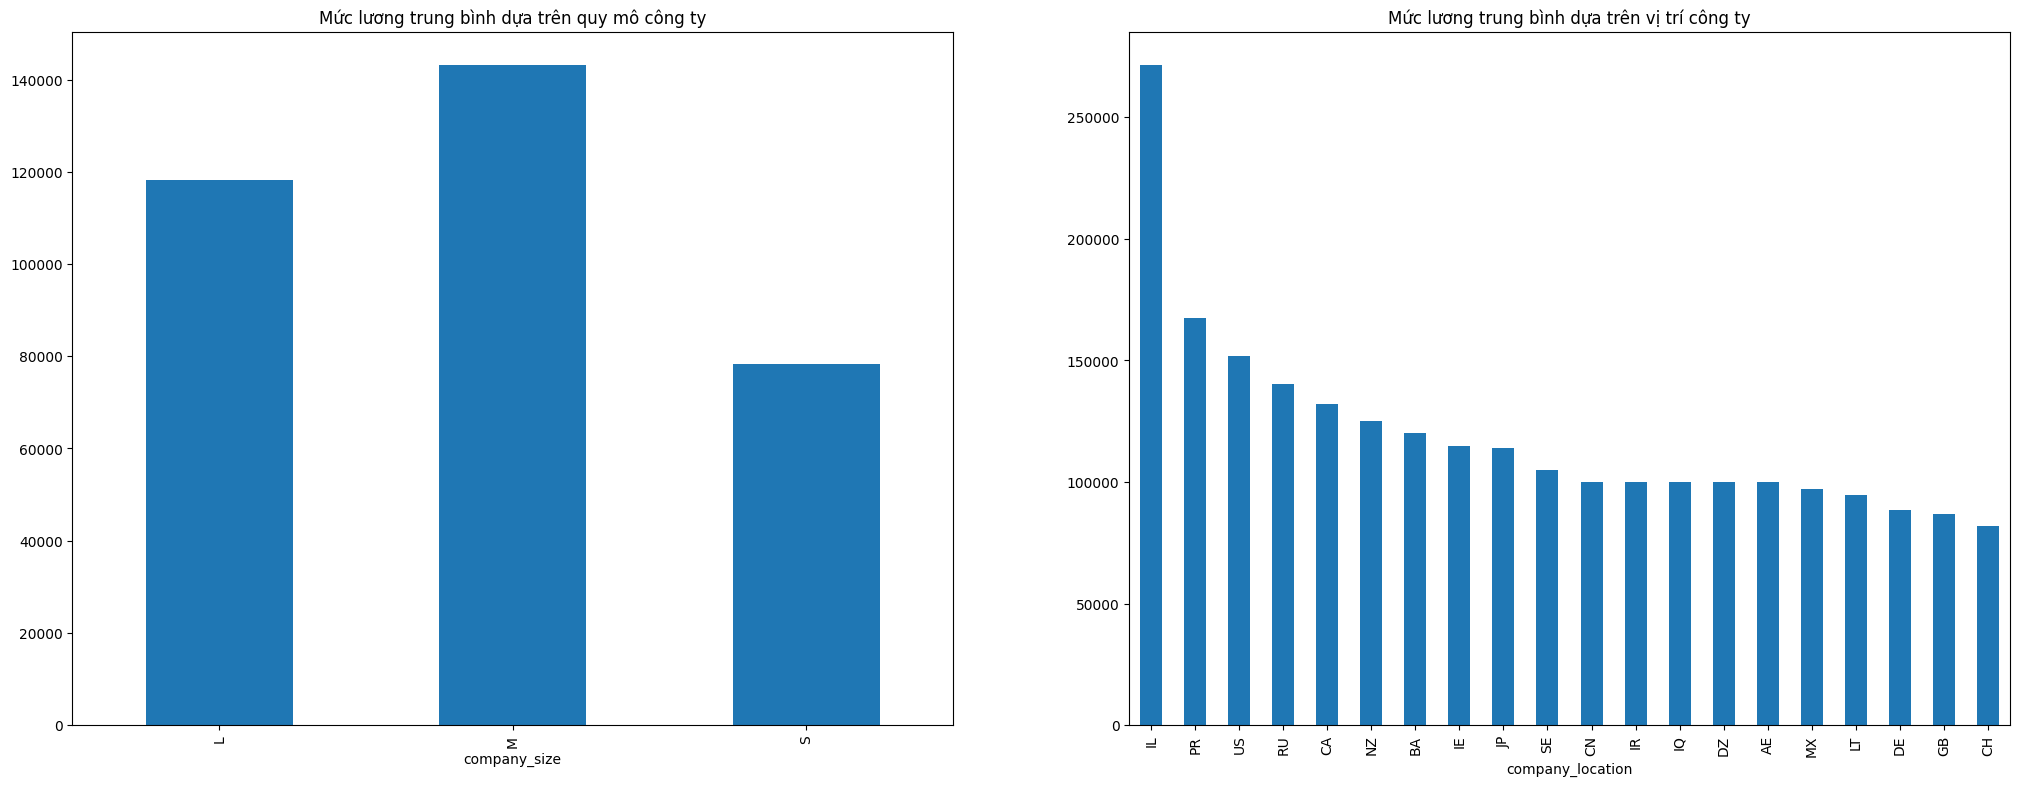

In [51]:

figure, axis = plt.subplots(1, 2,figsize=(25,9))

df.groupby('company_size').salary_in_usd.mean().plot(kind='bar',ax=axis[0])
axis[0].set_title('Mức lương trung bình dựa trên quy mô công ty')


df.groupby('company_location').salary_in_usd.mean().sort_values(ascending=False).head(20).plot(kind='bar',ax=axis[1])
axis[1].set_title('Mức lương trung bình dựa trên vị trí công ty')


- Quy mô công ty càng lớn lương càng cao
- Nga, Puerto Rico, Mỹ có mức lương trung bình hàng đầu

In [52]:
#nhóm dữ liệu theo cột 'job_title' và tính giá trị trung bình (mean) và số lượng (count) của cột 'salary_in_usd' cho mỗi nhóm
df.groupby('job_title').salary_in_usd.agg(['mean','count']).sort_values(by=['mean','count'],ascending=False).head(7)

,mean,count
job_title,,
Data Science Tech Lead,375000.000000,1
Cloud Data Architect,250000.000000,1
Data Lead,212500.000000,2
Data Analytics Lead,211254.500000,2
Principal Data Scientist,198171.125000,8
Director of Data Science,195140.727273,11
Principal Data Engineer,192500.000000,2


 - mức lương trung bình và số lượng công việc cho 7 vị trí công việc có mức lương cao nhất trong bộ dữ liệu

In [53]:
# tính số lượng giá trị duy nhất trong từng thuộc tính
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [54]:
df.company_location.value_counts().head(15)

US    3040
GB     172
CA      87
ES      77
IN      58
DE      56
FR      34
BR      15
AU      14
GR      14
PT      14
NL      13
MX      10
IE       7
SG       6
Name: company_location, dtype: int64

- Mỹ có nhiều dữ liệu việc làm nhất

In [55]:
# những công việc phổ biến nhất
a= df.groupby('job_title').work_year.count()
a.head(10)

job_title
3D Computer Vision Researcher           4
AI Developer                           11
AI Programmer                           2
AI Scientist                           16
Analytics Engineer                    103
Applied Data Scientist                 10
Applied Machine Learning Engineer       2
Applied Machine Learning Scientist     12
Applied Scientist                      58
Autonomous Vehicle Technician           2
Name: work_year, dtype: int64

<Axes: xlabel='work_year'>

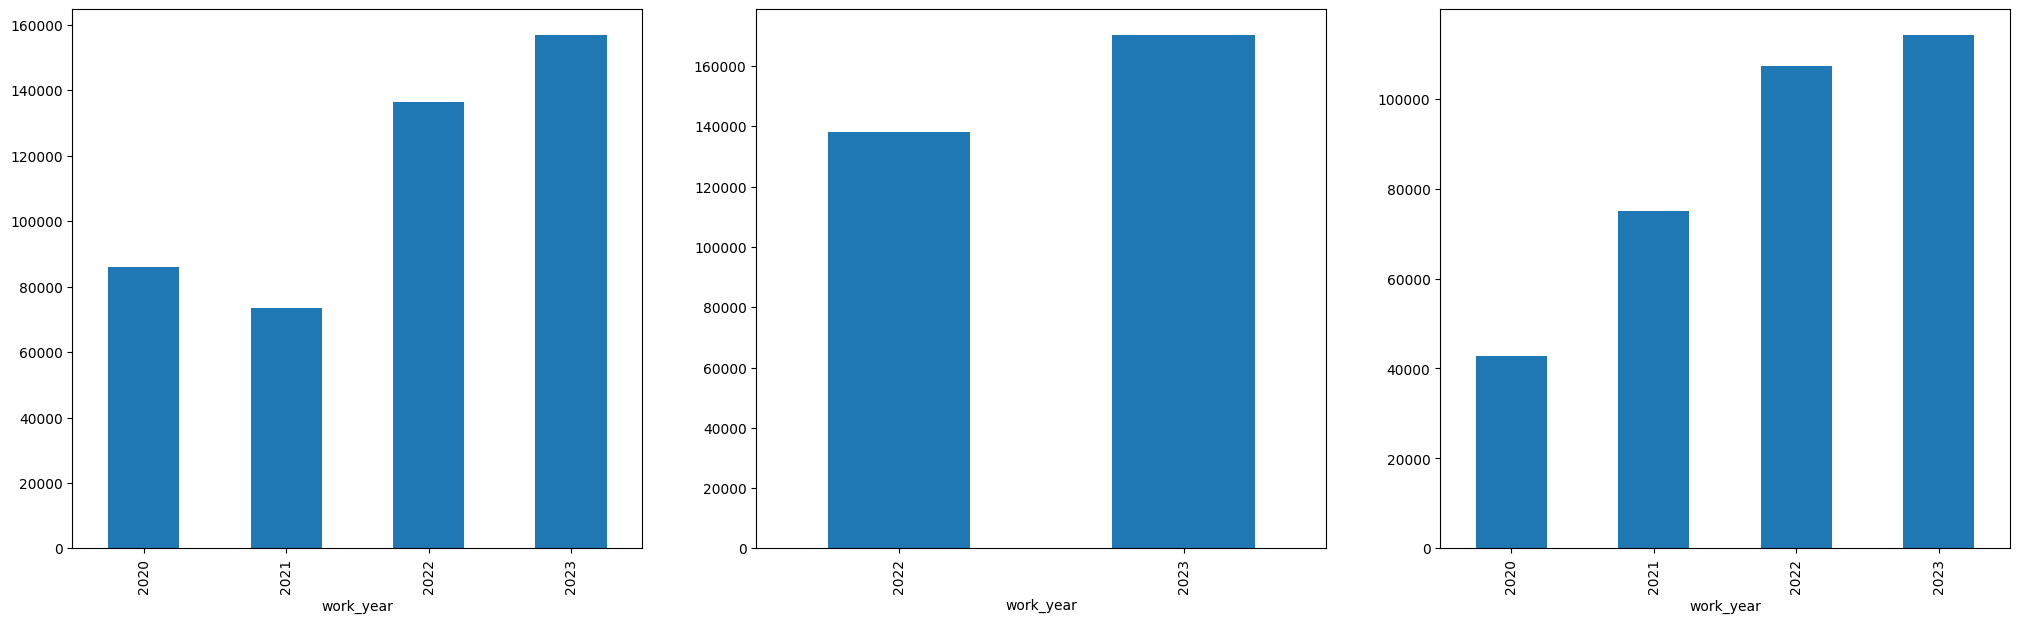

In [56]:
# vẽ biểu đồ mức lương dựa trên số năm kinh nghiệm cụ thể của công việc Data Scientist, Analytics Engineer, Data Analyst
figure, axis = plt.subplots(1, 3,figsize=(25,7))

df.loc[df['job_title']=='Data Scientist'].groupby('work_year').salary_in_usd.mean().plot(kind='bar',ax=axis[0])

df.loc[df['job_title']=='Analytics Engineer'].groupby('work_year').salary_in_usd.mean().plot(kind='bar',ax=axis[1])

df.loc[df['job_title']=='Data Analyst'].groupby('work_year').salary_in_usd.mean().plot(kind='bar',ax=axis[2])

In [57]:
df.groupby('experience_level').sum()

<ipython-input-57-c5ac2728f1c7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('experience_level').sum()


,work_year,salary,salary_in_usd,remote_ratio
experience_level,,,,
EN,647057,60281977,25134811,17650
EX,230552,28135451,22222126,5500
MI,1627874,199801247,84143381,37200
SE,5088530,427843197,385076496,113400
